# MACHINE LEARNING - Atividade 03

## Spooky Authors Prediction - NLP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [143]:
file = pd.read_csv(r"C:\Users\Helio\Documents\ALL THAT MATTERS\5 SEMESTRE - EESP\MACHINE LEARNING\train.csv")

In [144]:
data = file.copy()

In [145]:
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


## Feature Engineering

In [146]:
data['count_words'] = data['text'].apply(lambda x:len(str(x).split()))
data['count_letters'] = data['text'].apply(lambda x:len(x))
data['unique_words'] = data['text'].apply(lambda x:len(set(str(x).split())))

In [147]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [148]:
data["count_stopwords"] = data["text"].apply(
    lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [149]:
data['uppercase'] = data['text'].apply(lambda x:len([w for w in str(x).split() if w.isupper()]))

In [150]:
data['avg_length'] = data['text'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))
data['std_length'] = data['text'].apply(lambda x:np.std([len(w) for w in str(x).split()]))

In [117]:
data.head()

,id,text,author,count_words,count_letters,unique_words,count_stopwords,uppercase,avg_length,std_length
0,id26305,"This process, however, afforded me no means of...",EAP,41,231,35,19,2,4.658537,2.637532
1,id17569,It never once occurred to me that the fumbling...,HPL,14,71,14,8,0,4.142857,2.325546
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36,200,32,16,0,4.583333,2.639181
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34,206,32,13,0,5.088235,2.227735
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27,174,25,11,0,5.481481,3.315177


In [118]:
import seaborn as sns

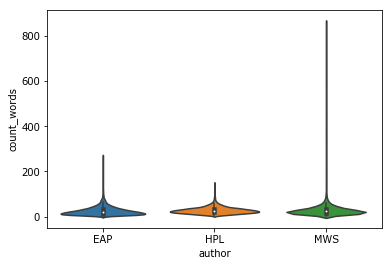

In [119]:
sns.violinplot(x="author", y="count_words", data=data)

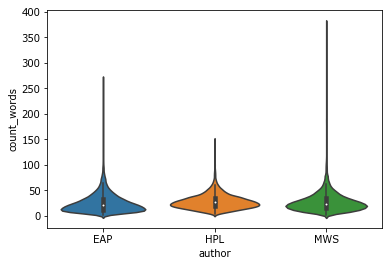

In [120]:
sns.violinplot(x="author", y="count_words", data=data[data['count_words']<400])

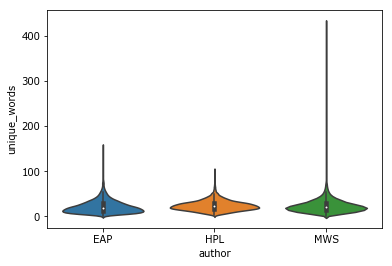

In [121]:
sns.violinplot(x="author", y="unique_words", data=data)

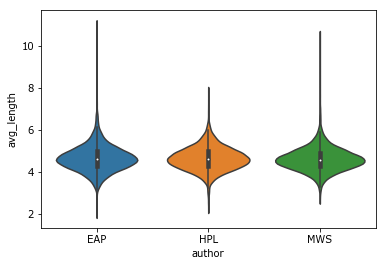

In [122]:
sns.violinplot(x="author", y="avg_length", data=data)

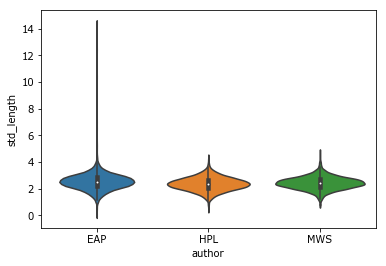

In [123]:
sns.violinplot(x="author", y="std_length", data=data)

In [124]:
data.describe()

,count_words,count_letters,unique_words,count_stopwords,uppercase,avg_length,std_length
count,19579.000000,19579.000000,19579.000000,19579.000000,19579.000000,19579.000000,19579.000000
mean,26.730477,149.057408,23.136115,13.057817,0.599213,4.624827,2.447325
std,19.048353,106.800189,13.457922,9.773517,0.994366,0.589194,0.532566
min,2.000000,21.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,15.000000,81.000000,14.000000,7.000000,0.000000,4.250000,2.116038
50%,23.000000,128.000000,21.000000,11.000000,0.000000,4.590909,2.441941
75%,34.000000,191.000000,30.000000,17.000000,1.000000,4.952381,2.773713
max,861.000000,4663.000000,429.000000,435.000000,27.000000,11.000000,14.430629


In [125]:
data[data['author']=="EAP"].describe()

,count_words,count_letters,unique_words,count_stopwords,uppercase,avg_length,std_length
count,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000
mean,25.442405,142.225949,21.894937,12.617722,0.553291,4.644952,2.522285
std,18.567706,105.751334,13.727397,9.540922,0.892966,0.631340,0.587794
min,2.000000,21.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,12.000000,68.000000,12.000000,6.000000,0.000000,4.250000,2.173051
50%,21.000000,115.000000,19.000000,10.000000,0.000000,4.600000,2.520787
75%,33.000000,186.000000,29.000000,17.000000,1.000000,5.000000,2.867442
max,267.000000,1533.000000,155.000000,135.000000,15.000000,11.000000,14.430629


In [126]:
data[data['author']=="MWS"].describe()

,count_words,count_letters,unique_words,count_stopwords,uppercase,avg_length,std_length
count,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000
mean,27.417273,151.659828,23.544672,13.742224,0.751489,4.598182,2.427885
std,23.134440,126.305008,14.925835,12.080172,1.203636,0.561558,0.473450
min,2.000000,21.000000,2.000000,0.000000,0.000000,2.666667,0.745356
25%,15.000000,84.000000,14.000000,7.000000,0.000000,4.250000,2.131481
50%,23.000000,130.000000,21.000000,12.000000,0.000000,4.560791,2.419108
75%,34.000000,192.000000,30.000000,17.000000,1.000000,4.907156,2.718562
max,861.000000,4663.000000,429.000000,435.000000,27.000000,10.500000,4.776644


In [127]:
data[data['author']=="HPL"].describe()

,count_words,count_letters,unique_words,count_stopwords,uppercase,avg_length,std_length
count,5635.000000,5635.000000,5635.000000,5635.000000,5635.000000,5635.000000,5635.000000
mean,27.799645,155.843478,24.437977,12.940728,0.500266,4.625193,2.363087
std,14.123252,82.020647,11.053739,6.855502,0.852313,0.554917,0.495362
min,4.000000,21.000000,3.000000,0.000000,0.000000,2.222222,0.400000
25%,18.000000,98.000000,17.000000,8.000000,0.000000,4.258065,2.041161
50%,26.000000,142.000000,23.000000,12.000000,0.000000,4.600000,2.358495
75%,35.000000,196.500000,30.000000,16.500000,1.000000,4.961538,2.680951
max,147.000000,900.000000,102.000000,62.000000,10.000000,7.833333,4.377187


In [25]:
from sklearn.preprocessing import LabelEncoder

In [151]:
encoder = LabelEncoder()
y = encoder.fit_transform(data.author.values)

In [152]:
data = data.drop(['author','text','id'], axis=1)

In [130]:
data.head()

,count_words,count_letters,unique_words,count_stopwords,uppercase,avg_length,std_length
0,41,231,35,19,2,4.658537,2.637532
1,14,71,14,8,0,4.142857,2.325546
2,36,200,32,16,0,4.583333,2.639181
3,34,206,32,13,0,5.088235,2.227735
4,27,174,25,11,0,5.481481,3.315177


In [131]:
from sklearn.preprocessing import StandardScaler

In [153]:
X = data.copy()

In [156]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.columns.values)

In [157]:
X.head()

,count_words,count_letters,unique_words,count_stopwords,uppercase,avg_length,std_length
0,0.749140,0.767271,0.881577,0.608004,1.408759,0.057214,0.357160
1,-0.668341,-0.730892,-0.678883,-0.517515,-0.602624,-0.818036,-0.228672
2,0.486644,0.477002,0.658654,0.301044,-0.602624,-0.070427,0.360257
3,0.381645,0.533183,0.658654,-0.005916,-0.602624,0.786532,-0.412336
4,0.014150,0.233550,0.138501,-0.210556,-0.602624,1.453979,1.629608


In [64]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=42, 
                                                    test_size=0.8, shuffle=True)

### Naive Model without adding Text Features

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [162]:
knn = KNeighborsClassifier()
log = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

#### Hard Voting Ensemble

In [179]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('lr', log), ('tree', tree)], voting='hard')

voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1,...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [180]:
from sklearn.model_selection import cross_val_score

for clf, label in zip([knn, log, tree, voting_clf],
                      ['KNN', 'Reg Logistica', 'tree', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
#We can see that Ensemble performed better than 3 of de models separately
#Low performances because there is no text features (yet?) 

Accuracy: 0.42 (+/- 0.00) [KNN]
Accuracy: 0.45 (+/- 0.00) [Reg Logistica]
Accuracy: 0.42 (+/- 0.01) [tree]
Accuracy: 0.45 (+/- 0.01) [Ensemble]


#### Soft Voting Ensemble

In [181]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('lr', log), ('tree', tree)], voting='soft')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1,...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [182]:
for clf, label in zip([knn, log, tree, voting_clf], 
                      ['KNN', 'Reg Logistica', 'tree', 'Ensemble']):
    scores = cross_val_score(clf, data, y, cv=5, scoring='accuracy')
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.40 (+/- 0.01) [KNN]
Accuracy: 0.45 (+/- 0.00) [Reg Logistica]
Accuracy: 0.42 (+/- 0.01) [tree]
Accuracy: 0.43 (+/- 0.00) [Ensemble]


#### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
forest = RandomForestClassifier(n_estimators=10, max_depth = 3)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
forest.score(X_test, Y_test)

0.45199182839632279

In [171]:
forest = RandomForestClassifier(n_estimators=200, max_depth = 7)
forest.fit(X_train, Y_train)
forest.score(X_test, Y_test)

#RANDOM FOREST IMPROVED ACCURACY

0.46588355464759962

#### AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [172]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=200, random_state=42)

In [173]:
ada_clf.score(X_test, Y_test)

0.40755873340143001

In [103]:
ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 3,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 1,
 'n_estimators': 200,
 'random_state': 42}

#### Gradient Boosting

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

In [176]:
gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=120, learning_rate=1.0, random_state=42)
gb_clf.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [177]:
gb_clf.score(X_test, Y_test)

0.41818181818181815

In [108]:
gb_clf.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 120,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter Optimization for Individual Models

#### KNN

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [190]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_jobs=4))])

neighbors_range = range(1,11)
weights = ['uniform','distance']
leaf_range = range(26,36)

grid = [{'knn__n_neighbors':neighbors_range,
         'knn__weights':weights,
         'knn__leaf_size':leaf_range}]

cv = GridSearchCV(estimator=pipe_knn,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=10)

cv = cv.fit(X_train, Y_train)
print(cv.best_score_)
print(cv.best_params_)

0.425798212005
{'knn__leaf_size': 26, 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}


In [191]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_jobs=4))])

neighbors_range = range(10,16)
leaf_range = range(17,27)

grid = [{'knn__n_neighbors':neighbors_range,
         'knn__leaf_size':leaf_range}]

cv = GridSearchCV(estimator=pipe_knn,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=10)

cv = cv.fit(X_train, Y_train)
print(cv.best_score_)
print(cv.best_params_)

0.437037037037
{'knn__leaf_size': 17, 'knn__n_neighbors': 15}


#### Logistic Regression

In [230]:
pipe_log = Pipeline([('scl', StandardScaler()),
                     ('log', LogisticRegression(n_jobs=4, random_state=42))])

c_range = range(-5,5)
penalties = ['l1','l2']
solvers = ['liblinear','saga']

grid = [{'log__C':[10**c for c in c_range],
         'log__penalty':penalties,
         'log__solver':solvers}]

cv = GridSearchCV(estimator=pipe_log,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=10)

cv = cv.fit(X_train, Y_train)
print(cv.best_score_)
print(cv.best_params_)

0.45159642401
{'log__C': 10, 'log__penalty': 'l1', 'log__solver': 'liblinear'}


#### Decision Tree

In [237]:
pipe_tree = Pipeline([('scl', StandardScaler()),
                      ('tree', DecisionTreeClassifier(random_state=42))])

criteria = ['gini','entropy']
max_depths = [5,10,15,20,25,30]
max_features = ['sqrt','log2',None]

grid = [{'tree__criterion':criteria,
         'tree__max_depth':max_depths,
         'tree__max_features':max_features}]

cv = GridSearchCV(estimator=pipe_tree,
                 param_grid=grid,
                 scoring='accuracy',
                 cv=10)

cv = cv.fit(X_train, Y_train)
print(cv.best_score_)
print(cv.best_params_)

0.424521072797
{'tree__criterion': 'gini', 'tree__max_depth': 5, 'tree__max_features': 'sqrt'}


#### Random Forest

In [250]:
pipe_forest = Pipeline([('scl', StandardScaler()),
                        ('forest', RandomForestClassifier(random_state=42, n_jobs=4))])

max_depths = [5,10,15,20,25,30]
max_features = ['sqrt','log2',None]
n_estimators = [10,25,50,100,200,500]

grid = [{'forest__n_estimators':n_estimators,
         'forest__max_depth':max_depths,
         'forest__max_features':max_features}]

cv = GridSearchCV(estimator=pipe_forest,
                 param_grid=grid,
                 scoring='accuracy',
                 cv=10)

cv = cv.fit(X_train, Y_train)
print(cv.best_score_)
print(cv.best_params_)

0.456704980843
{'forest__max_depth': 5, 'forest__max_features': 'sqrt', 'forest__n_estimators': 50}


#### AdaBoost

In [255]:
pipe_ada = Pipeline([('scl', StandardScaler()),
                     ('ada', AdaBoostClassifier(random_state=42))])

n_estimators = [10,25,50,100,200,500]
learning_rate = [0.001, 0.01, 0.1, 1, 10, 100]

grid = [{'ada__n_estimators':n_estimators,
         'ada__learning_rate':learning_rate}]

cv = GridSearchCV(estimator=pipe_ada,
                 param_grid=grid,
                 scoring='accuracy',
                 cv=10)

cv = cv.fit(X_train, Y_train)
print(cv.best_score_)
print(cv.best_params_)

0.45619412516
{'ada__learning_rate': 0.1, 'ada__n_estimators': 500}


In [259]:
pipe_ada = Pipeline([('scl', StandardScaler()),
                     ('ada', AdaBoostClassifier(random_state=42, learning_rate=0.1, n_estimators=1000))])
pipe_ada.fit(X_train, Y_train)
pipe_ada.score(X_test, Y_test)

#adaboost returns from the ashes: turned out to be the best until now

0.4636108273748723

#### Gradient Boosting

In [263]:
pipe_gb = Pipeline([('scl', StandardScaler()),
                    ('gb', GradientBoostingClassifier(random_state=42,
                                                      learning_rate=0.1))])

n_estimators = [50,100,200,500]
max_depth = [5,10,50]

grid = [{'gb__n_estimators':n_estimators,
         'gb__max_depth':max_depth}]

cv = GridSearchCV(estimator=pipe_gb,
                 param_grid=grid,
                 scoring='accuracy',
                 cv=10, n_jobs=4)

cv = cv.fit(X_train, Y_train)
print(cv.best_score_)
print(cv.best_params_)

0.444444444444
{'gb__max_depth': 5, 'gb__n_estimators': 50}


In [264]:
#repeat the process more than once in order not to scale the combination of parameters

n_estimators = [5,10,25,50]
max_depth = [1,3,5]

grid = [{'gb__n_estimators':n_estimators,
         'gb__max_depth':max_depth}]

cv = GridSearchCV(estimator=pipe_gb,
                 param_grid=grid,
                 scoring='accuracy',
                 cv=10, n_jobs=4)

cv = cv.fit(X_train, Y_train)
print(cv.best_score_)
print(cv.best_params_)

#n_estimators = 50
#max_depth=3
#learning_rate=0.1

0.457471264368
{'gb__max_depth': 3, 'gb__n_estimators': 50}


### Hard Voting Ensembled Model: non optimized parameters x optimized parameters

In [266]:
voting_clf = VotingClassifier(
    estimators=[('knn', pipe_knn), ('lr', pipe_log), ('tree', pipe_tree),('forest', pipe_forest),
                ('adaboost', pipe_ada), ('gradient boosting', pipe_gb)], voting='hard')

voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('knn', Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=15, p=2,
           weights='uniform'))])), (...     presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False))]))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [269]:
for clf, label in zip([pipe_knn, pipe_log, pipe_tree, pipe_forest, pipe_ada, pipe_gb, voting_clf],
                      ['KNN', 'Reg Logistica', 'tree', 'forest', 'Adaboost', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    
    print("Accuracy: %0.5f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), label))
    
#ENSEMBLE JUST DIDN'T BEAT ADABOOST (BUT HAS LESS VARIANCE) 

Accuracy: 0.43516 (+/- 0.00551) [KNN]
Accuracy: 0.45370 (+/- 0.00436) [Reg Logistica]
Accuracy: 0.38199 (+/- 0.00892) [tree]
Accuracy: 0.46494 (+/- 0.01051) [forest]
Accuracy: 0.46979 (+/- 0.01089) [Adaboost]
Accuracy: 0.46688 (+/- 0.00846) [Gradient Boosting]
Accuracy: 0.46913 (+/- 0.00901) [Ensemble]


In [276]:
pipe_knn_optim = Pipeline([('scl', StandardScaler()),
                           ('knn', KNeighborsClassifier(n_jobs=4,
                                                  leaf_size=17,
                                                  n_neighbors=15))])

pipe_log_optim = Pipeline([('scl', StandardScaler()),
                           ('log', LogisticRegression(n_jobs=4, 
                                                random_state=42,
                                                C=10,
                                                penalty='l1',
                                                solver='liblinear'))])

pipe_tree_optim = Pipeline([('scl', StandardScaler()),
                            ('tree', DecisionTreeClassifier(random_state=42,
                                                      criterion='gini',
                                                      max_depth=5,
                                                      max_features='sqrt'))])

pipe_forest_optim = Pipeline([('scl', StandardScaler()),
                              ('forest', RandomForestClassifier(random_state=42, 
                                                          n_jobs=4,
                                                          max_depth=5,
                                                          max_features='sqrt',
                                                          n_estimators=50))])
pipe_ada_optim = Pipeline([('scl', StandardScaler()),
                           ('ada', AdaBoostClassifier(random_state=42,
                                                learning_rate=0.1,
                                                n_estimators=1000))])

pipe_gb_optim = Pipeline([('scl', StandardScaler()),
                          ('gb', GradientBoostingClassifier(random_state=42,
                                                      learning_rate=0.1,
                                                      max_depth=3,
                                                      n_estimators=50))])

In [277]:
voting_clf_optim = VotingClassifier(
    estimators=[('knn', pipe_knn_optim), ('lr', pipe_log_optim), ('tree', pipe_tree_optim),('forest', pipe_forest_optim),
                ('adaboost', pipe_ada_optim), ('gradient boosting', pipe_gb_optim)], voting='hard')

voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('knn', Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=15, p=2,
           weights='uniform'))])), (...     presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False))]))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [278]:
print('Optimized Accuracies')
for clf, label in zip([pipe_knn_optim, pipe_log_optim, pipe_tree_optim, pipe_forest_optim, 
                       pipe_ada_optim, pipe_gb_optim, voting_clf_optim],
                      ['KNN', 'Reg Logistica', 'tree', 'forest', 'Adaboost', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    
    print("Accuracy: %0.5f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), label))
    
#for some reason, optimized ensemble performed worse, but this should be the procedure

Optimized Accuracies
Accuracy: 0.43516 (+/- 0.00551) [KNN]
Accuracy: 0.45396 (+/- 0.00468) [Reg Logistica]
Accuracy: 0.44619 (+/- 0.01057) [tree]
Accuracy: 0.45472 (+/- 0.01051) [forest]
Accuracy: 0.46979 (+/- 0.01089) [Adaboost]
Accuracy: 0.46688 (+/- 0.00846) [Gradient Boosting]
Accuracy: 0.46764 (+/- 0.01013) [Ensemble]
